# NLP Assignment 1

## 1. EDA

In [249]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import re
import datetime

from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

In [250]:
df = pd.read_csv('/Users/thejakamahaulpatha/Desktop/AML 2304/Assignment 1/Assignment_1_data')

In [318]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [252]:
df.shape

(421993, 19)

In [253]:
df.head()

,DATE,TIME,UNIQUE_STORY_INDEX,EVENT_TYPE,PNAC,STORY_DATE_TIME,TAKE_DATE_TIME,HEADLINE_ALERT_TEXT,ACCUMULATED_STORY_TEXT,TAKE_TEXT,PRODUCTS,TOPICS,RELATED_RICS,NAMED_ITEMS,HEADLINE_SUBTYPE,STORY_TYPE,TABULAR_FLAG,ATTRIBUTION,LANGUAGE
0,2013-06-01,00:00:00.704,20130601000000nASA05F0W,ALERT,nASA05F0W,2013-06-01 00:00:00,2013-06-01 00:00:00,MERCATOR MINERALS ANNOUNCES SENIOR MANAGEMENT CHANGES,NaN,NaN,E U CAN,MNGISS BACT MET BMAT MIN MINE MTAL CMPNY CA AMERS MEMI BLR LEN RTRS,ML.TO,NaN,NaN,S,False,RTRS,EN
1,2013-06-01,00:00:00.885,20130601000001nS6N0A8042,ALERT,nS6N0A8042,2013-06-01 00:00:01,2013-06-01 00:00:01,S.KOREA SAYS MAY TRADE BALANCE AT PROVISIONAL $+6.03 BLN VS REVISED $+2.4 BLN IN APRIL,NaN,NaN,M D T E C MTL GRO SOF O,EMRG KR MCE ECI NEWS TRD ASIA TRACC LEN RTRS,KRIMGR=ECI KRTBAL=ECI 0#KRCOMP1=KQ KREXGR=ECI KRW=,NaN,NaN,S,False,RTRS,EN
2,2013-06-01,00:00:01.052,20130501000000nEAP51Z100,DELETE,nEAP51Z100,2013-05-01 00:00:00,2013-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-06-01,00:00:01.052,20130601000000nEAP51Z100,HEADLINE,nEAP51Z100,2013-06-01 00:00:00,2013-06-01 00:00:00,"Test, Please Ignore -- EMEA -- 06/01 00:00",NaN,NaN,TEST,AGA LEN RTRS,NaN,NaN,2.0,S,False,RTRS,EN
4,2013-06-01,00:00:01.055,20130601000000nEAP51Z100,STORY_TAKE_OVERWRITE,nEAP51Z100,2013-06-01 00:00:00,NaN,"Test, Please Ignore -- EMEA -- 06/01 00:00",NaN,"Test, Please Ignore -- EMEA -- 06/01 00:00",TEST,AGA LEN RTRS,NaN,NaN,NaN,S,False,RTRS,EN


In [254]:
df.tail()

,DATE,TIME,UNIQUE_STORY_INDEX,EVENT_TYPE,PNAC,STORY_DATE_TIME,TAKE_DATE_TIME,HEADLINE_ALERT_TEXT,ACCUMULATED_STORY_TEXT,TAKE_TEXT,PRODUCTS,TOPICS,RELATED_RICS,NAMED_ITEMS,HEADLINE_SUBTYPE,STORY_TYPE,TABULAR_FLAG,ATTRIBUTION,LANGUAGE
421988,2013-06-30,23:59:13.271,20130630235002nT9N0E405V,STORY_TAKE_APPEND,nT9N0E405V,2013-06-30 23:50:02,NaN,Japan big manufacturers' mood turns positive -BOJ tankan,"TOKYO, July 1 (Reuters) - Big Japanese manufacturers' mood \nturned positive in April-June for the first time in nearly two \nyears, the Bank of Japan's closely watched ""tankan"" survey \nshowed, a sign the government's reflationary policies continue \nto boost business morale despite recent market turbulence. \n The headline index for big manufacturers' sentiment was plus \n4 in June, compared with minus 8 in March and the median market \nforecast for plus 3, the quarterly tankan survey showed on \nMonday. It was the first positive reading, meaning that \noptimists outnumbered pessimists, since the September 2011 \nsurvey. \n Big manufacturers expect conditions to improve over the next \nthree months, with the index for September seen at plus 10, \nagainst plus 7 seen by economists in a Reuters poll. \n The survey also showed big firms plan to raise their capital \nspending by 5.5 percent in the financial year that started on \nApril 1, compared with a median forecast for a 2.9 percent \nincrease. \n The sentiment indexes are derived by subtracting the \npercentage of respondents who say conditions are poor from those \nwho say they are good. A positive reading means optimists \noutnumber pessimists. \n To view the BOJ's table on the survey, click on \n http://www.boj.or.jp/en/statistics/tk/gaiyo/2011/tka1306.pdf \n \n (Reporting by Leika Kihara and Tetsushi Kajimoto; Editing by \nEdmund Klamann) \n ((tetsushi.kajimoto@thomsonreuters.com)(+81 3 \n6441-1829)(Reuters Messaging: \ntetsushi.kajimoto.thomsonreuters.com@reuters.net)) \n","\n((For more Japanese economic coverage click: \n -- Real-time Japanese indicator diary <ECONJP> \n -- Japanese macro economic news [MCE-JP-M] \n -- Japanese economic indicator news [M-JP-ECI] \n -- Economic indicator news in Japanese [RSS-JP-ECI] \n -- Bank of Japan news [BOJ-M-MCE] \n Web sites for Japanese economic agencies \n -- Cabinet Office http://www.cao.go.jp/ \n -- Ministry of Internal Affairs http://www.soumu.go.jp/ \n -- Ministry of Finance http://www.mof.go.jp/ \n -- Ministry of Economy (METI) http://www.meti.go.jp/ \n -- Bank of Japan http://www.boj.or.jp/ \n For more economic news click: \n -- Top News for the global economy [nTOPMACRO] \n -- Global macroeconomic data coverage [M-ECI] \n For graphs for economic data click <ECONJP>, right-click on the data you want to look at, select 'Related Graph' (3000 Xtra) or 'Show'>'Chart' (Trader). \n Access to some items may depend on permissioning. \n If you need assistance click <HELP>))",J C D E M O T U MTL NAT GRO SOF OIL NAW UKI DNP,CEN BOJ ECI JP FRX MCE ASIA NEWS CMPNY LEN RTRS,JPBCLG=ECI JPBCSN=ECI JPBCLN=ECI JPBCLO=ECI JPBCSM=ECI JPBCOV=ECI JPASTBDSSJPW,NaN,NaN,S,True,RTRS,EN
421989,2013-06-30,23:59:43.707,20130630235943nIFR1Hvx2X,HEADLINE,nIFR1Hvx2X,2013-06-30 23:59:43,2013-06-30 23:59:43,BUZZ-JPY ECON-Big firms see USD/JPY averaging 91.20 in FY,NaN,NaN,IFRF FXBUZ BUZ IFRR IFRRJ,ASIA CEN ECI FRX INT JP MCE LEN RTRS,NaN,NaN,2.0,S,True,RTRS,EN
421990,2013-06-30,23:59:43.707,20130630235943nIFR1Hvx2X,STORY_TAKE_OVERWRITE,nIFR1Hvx2X,2013-06-30 23:59:43,NaN,BUZZ-JPY ECON-Big firms see USD/JPY averaging 91.20 in FY,NaN,"\n\t\t\t\t\t\t\n* Big manufacturers see USD/JPY averaging 91.20 this fiscal year.\n* Budget estimates likely to raised in come September however.\n* With USD/JPY already sub-100.00, importers will aggressively buy dips.\n* Exporter sales eyed on way up but no aggression - lots of sales already.\n* Quite a few exporters were noted sellers on the 98-handle last week.\n* Many may want to wait out higher levels, especially for post-Se

In [255]:
df.dtypes

DATE                       object
TIME                       object
UNIQUE_STORY_INDEX         object
EVENT_TYPE                 object
PNAC                       object
STORY_DATE_TIME            object
TAKE_DATE_TIME             object
HEADLINE_ALERT_TEXT        object
ACCUMULATED_STORY_TEXT     object
TAKE_TEXT                  object
PRODUCTS                   object
TOPICS                     object
RELATED_RICS               object
NAMED_ITEMS                object
HEADLINE_SUBTYPE          float64
STORY_TYPE                 object
TABULAR_FLAG               object
ATTRIBUTION                object
LANGUAGE                   object
dtype: object

In [256]:
round(df.isnull().mean()*100,0)

DATE                       0.0
TIME                       0.0
UNIQUE_STORY_INDEX         0.0
EVENT_TYPE                 0.0
PNAC                       0.0
STORY_DATE_TIME            0.0
TAKE_DATE_TIME            41.0
HEADLINE_ALERT_TEXT       10.0
ACCUMULATED_STORY_TEXT    96.0
TAKE_TEXT                 59.0
PRODUCTS                  10.0
TOPICS                    10.0
RELATED_RICS              64.0
NAMED_ITEMS               76.0
HEADLINE_SUBTYPE          63.0
STORY_TYPE                10.0
TABULAR_FLAG              10.0
ATTRIBUTION               10.0
LANGUAGE                  10.0
dtype: float64

In [257]:
df1 = df[['STORY_DATE_TIME','HEADLINE_ALERT_TEXT']]
df1

,STORY_DATE_TIME,HEADLINE_ALERT_TEXT
0,2013-06-01 00:00:00,MERCATOR MINERALS ANNOUNCES SENIOR MANAGEMENT CHANGES
1,2013-06-01 00:00:01,S.KOREA SAYS MAY TRADE BALANCE AT PROVISIONAL $+6.03 BLN VS REVISED $+2.4 BLN IN APRIL
2,2013-05-01 00:00:00,NaN
3,2013-06-01 00:00:00,"Test, Please Ignore -- EMEA -- 06/01 00:00"
4,2013-06-01 00:00:00,"Test, Please Ignore -- EMEA -- 06/01 00:00"
...,...,...
421988,2013-06-30 23:50:02,Japan big manufacturers' mood turns positive -BOJ tankan
421989,2013-06-30 23:59:43,BUZZ-JPY ECON-Big firms see USD/JPY averaging 91.20 in FY
421990,2013-06-30 23:59:43,BUZZ-JPY ECON-Big firms see USD/JPY averaging 91.20 in FY
421991,2013-06-30 23:59:52,UPDATE 1-Japan big manufacturers' mood turns positive-BOJ tankan


## 2. Data Preprocessing

### 2.1 Removing time from the 'STORY_DATE_TIME	' column

In [258]:
df1['STORY_DATE_TIME'] = df1['STORY_DATE_TIME'].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").date())


<ipython-input-258-f7afcb113813>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['STORY_DATE_TIME'] = df1['STORY_DATE_TIME'].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").date())


### 2.2 Removing non Alphanumeric from text data

In [259]:
df1['HEADLINE_ALERT_TEXT'] = df1['HEADLINE_ALERT_TEXT'].map(lambda x: re.sub('[^a-zA-Z ]+','',str(x)))

<ipython-input-259-515b19c20c9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['HEADLINE_ALERT_TEXT'] = df1['HEADLINE_ALERT_TEXT'].map(lambda x: re.sub('[^a-zA-Z ]+','',str(x)))


### 2.3 Convert to Lower

In [260]:
df1['HEADLINE_ALERT_TEXT'] = df1['HEADLINE_ALERT_TEXT'].map(lambda x: str(x).lower())

<ipython-input-260-0bfeeddb7be1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['HEADLINE_ALERT_TEXT'] = df1['HEADLINE_ALERT_TEXT'].map(lambda x: str(x).lower())


### 2.4 Tokenizing

In [261]:
from nltk.tokenize import word_tokenize

In [262]:
df1['Tokenized'] = df1['HEADLINE_ALERT_TEXT'].map(lambda x: word_tokenize(str(x)))

<ipython-input-262-7db7fcca4da9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Tokenized'] = df1['HEADLINE_ALERT_TEXT'].map(lambda x: word_tokenize(str(x)))


In [263]:
df1

,STORY_DATE_TIME,HEADLINE_ALERT_TEXT,Tokenized
0,2013-06-01,mercator minerals announces senior management changes,"[mercator, minerals, announces, senior, management, changes]"
1,2013-06-01,skorea says may trade balance at provisional bln vs revised bln in april,"[skorea, says, may, trade, balance, at, provisional, bln, vs, revised, bln, in, april]"
2,2013-05-01,nan,[nan]
3,2013-06-01,test please ignore emea,"[test, please, ignore, emea]"
4,2013-06-01,test please ignore emea,"[test, please, ignore, emea]"
...,...,...,...
421988,2013-06-30,japan big manufacturers mood turns positive boj tankan,"[japan, big, manufacturers, mood, turns, positive, boj, tankan]"
421989,2013-06-30,buzzjpy econbig firms see usdjpy averaging in fy,"[buzzjpy, econbig, firms, see, usdjpy, averaging, in, fy]"
421990,2013-06-30,buzzjpy econbig firms see usdjpy averaging in fy,"[buzzjpy, econbig, firms, see, usdjpy, averaging, in, fy]"
421991,2013-06-30,update japan big manufacturers mood turns positiveboj tankan,"[update, japan, big, manufacturers, mood, turns, positiveboj, tankan]"


### 2.5 Stop word Removal

In [264]:
from nltk.corpus import stopwords as sw

In [265]:
stopwordsEnglish = sw.words('English')

In [266]:
def removeStops(x):
    arrTemp = []
    for i in x:
        if i not in stopwordsEnglish:
            arrTemp.append(i)

    return arrTemp

# df1['Stop Word Removed'] = df1['Tokenized'].map(lambda x: removeStops(str(x)) )
df1['Stop Word Removed'] = df1['Tokenized'].map(lambda x: removeStops(x) )

<ipython-input-266-4269d6af84d4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Stop Word Removed'] = df1['Tokenized'].map(lambda x: removeStops(x) )


In [267]:
df1

,STORY_DATE_TIME,HEADLINE_ALERT_TEXT,Tokenized,Stop Word Removed
0,2013-06-01,mercator minerals announces senior management changes,"[mercator, minerals, announces, senior, management, changes]","[mercator, minerals, announces, senior, management, changes]"
1,2013-06-01,skorea says may trade balance at provisional bln vs revised bln in april,"[skorea, says, may, trade, balance, at, provisional, bln, vs, revised, bln, in, april]","[skorea, says, may, trade, balance, provisional, bln, vs, revised, bln, april]"
2,2013-05-01,nan,[nan],[nan]
3,2013-06-01,test please ignore emea,"[test, please, ignore, emea]","[test, please, ignore, emea]"
4,2013-06-01,test please ignore emea,"[test, please, ignore, emea]","[test, please, ignore, emea]"
...,...,...,...,...
421988,2013-06-30,japan big manufacturers mood turns positive boj tankan,"[japan, big, manufacturers, mood, turns, positive, boj, tankan]","[japan, big, manufacturers, mood, turns, positive, boj, tankan]"
421989,2013-06-30,buzzjpy econbig firms see usdjpy averaging in fy,"[buzzjpy, econbig, firms, see, usdjpy, averaging, in, fy]","[buzzjpy, econbig, firms, see, usdjpy, averaging, fy]"
421990,2013-06-30,buzzjpy econbig firms see usdjpy averaging in fy,"[buzzjpy, econbig, firms, see, usdjpy, averaging, in, fy]","[buzzjpy, econbig, firms, see, usdjpy, averaging, fy]"
421991,2013-06-30,update japan big manufacturers mood turns positiveboj tankan,"[update, japan, big, manufacturers, mood, turns, positiveboj, tankan]","[update, japan, big, manufacturers, mood, turns, positiveboj, tankan]"


### 2.6 Lemmatization

In [268]:
lem = WordNetLemmatizer()

def lemmatizeWords(x):
    arrTemp = []
    for i in x:
        arrTemp.append(lem.lemmatize(i,pos='n'))

    return arrTemp

# df1['Stop Word Removed'] = df1['Tokenized'].map(lambda x: removeStops(str(x)) )
df1['Lemmatized'] = df1['Stop Word Removed'].map(lambda x: lemmatizeWords(x) )

<ipython-input-268-4c9023f753ad>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Lemmatized'] = df1['Stop Word Removed'].map(lambda x: lemmatizeWords(x) )


In [269]:
df1

,STORY_DATE_TIME,HEADLINE_ALERT_TEXT,Tokenized,Stop Word Removed,Lemmatized
0,2013-06-01,mercator minerals announces senior management changes,"[mercator, minerals, announces, senior, management, changes]","[mercator, minerals, announces, senior, management, changes]","[mercator, mineral, announces, senior, management, change]"
1,2013-06-01,skorea says may trade balance at provisional bln vs revised bln in april,"[skorea, says, may, trade, balance, at, provisional, bln, vs, revised, bln, in, april]","[skorea, says, may, trade, balance, provisional, bln, vs, revised, bln, april]","[skorea, say, may, trade, balance, provisional, bln, v, revised, bln, april]"
2,2013-05-01,nan,[nan],[nan],[nan]
3,2013-06-01,test please ignore emea,"[test, please, ignore, emea]","[test, please, ignore, emea]","[test, please, ignore, emea]"
4,2013-06-01,test please ignore emea,"[test, please, ignore, emea]","[test, please, ignore, emea]","[test, please, ignore, emea]"
...,...,...,...,...,...
421988,2013-06-30,japan big manufacturers mood turns positive boj tankan,"[japan, big, manufacturers, mood, turns, positive, boj, tankan]","[japan, big, manufacturers, mood, turns, positive, boj, tankan]","[japan, big, manufacturer, mood, turn, positive, boj, tankan]"
421989,2013-06-30,buzzjpy econbig firms see usdjpy averaging in fy,"[buzzjpy, econbig, firms, see, usdjpy, averaging, in, fy]","[buzzjpy, econbig, firms, see, usdjpy, averaging, fy]","[buzzjpy, econbig, firm, see, usdjpy, averaging, fy]"
421990,2013-06-30,buzzjpy econbig firms see usdjpy averaging in fy,"[buzzjpy, econbig, firms, see, usdjpy, averaging, in, fy]","[buzzjpy, econbig, firms, see, usdjpy, averaging, fy]","[buzzjpy, econbig, firm, see, usdjpy, averaging, fy]"
421991,2013-06-30,update japan big manufacturers mood turns positiveboj tankan,"[update, japan, big, manufacturers, mood, turns, positiveboj, tankan]","[update, japan, big, manufacturers, mood, turns, positiveboj, tankan]","[update, japan, big, manufacturer, mood, turn, positiveboj, tankan]"


### 2.7 Fequent Words

In [270]:
fdist = FreqDist()

In [276]:
def getFreqWrod(x):
    fdist = FreqDist()
    for word in x:
        fdist[word] +=1
    return dict(fdist.most_common(3))

df1['FDist'] = df1['Lemmatized'].map(lambda x: getFreqWrod(x))

<ipython-input-276-bac879c8de00>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['FDist'] = df1['Lemmatized'].map(lambda x: getFreqWrod(x))


In [277]:
df1

,STORY_DATE_TIME,HEADLINE_ALERT_TEXT,Tokenized,Stop Word Removed,Lemmatized,FDist
0,2013-06-01,mercator minerals announces senior management changes,"[mercator, minerals, announces, senior, management, changes]","[mercator, minerals, announces, senior, management, changes]","[mercator, mineral, announces, senior, management, change]","{'mercator': 1, 'mineral': 1, 'announces': 1}"
1,2013-06-01,skorea says may trade balance at provisional bln vs revised bln in april,"[skorea, says, may, trade, balance, at, provisional, bln, vs, revised, bln, in, april]","[skorea, says, may, trade, balance, provisional, bln, vs, revised, bln, april]","[skorea, say, may, trade, balance, provisional, bln, v, revised, bln, april]","{'bln': 2, 'skorea': 1, 'say': 1}"
2,2013-05-01,nan,[nan],[nan],[nan],{'nan': 1}
3,2013-06-01,test please ignore emea,"[test, please, ignore, emea]","[test, please, ignore, emea]","[test, please, ignore, emea]","{'test': 1, 'please': 1, 'ignore': 1}"
4,2013-06-01,test please ignore emea,"[test, please, ignore, emea]","[test, please, ignore, emea]","[test, please, ignore, emea]","{'test': 1, 'please': 1, 'ignore': 1}"
...,...,...,...,...,...,...
421988,2013-06-30,japan big manufacturers mood turns positive boj tankan,"[japan, big, manufacturers, mood, turns, positive, boj, tankan]","[japan, big, manufacturers, mood, turns, positive, boj, tankan]","[japan, big, manufacturer, mood, turn, positive, boj, tankan]","{'japan': 1, 'big': 1, 'manufacturer': 1}"
421989,2013-06-30,buzzjpy econbig firms see usdjpy averaging in fy,"[buzzjpy, econbig, firms, see, usdjpy, averaging, in, fy]","[buzzjpy, econbig, firms, see, usdjpy, averaging, fy]","[buzzjpy, econbig, firm, see, usdjpy, averaging, fy]","{'buzzjpy': 1, 'econbig': 1, 'firm': 1}"
421990,2013-06-30,buzzjpy econbig firms see usdjpy averaging in fy,"[buzzjpy, econbig, firms, see, usdjpy, averaging, in, fy]","[buzzjpy, econbig, firms, see, usdjpy, averaging, fy]","[buzzjpy, econbig, firm, see, usdjpy, averaging, fy]","{'buzzjpy': 1, 'econbig': 1, 'firm': 1}"
421991,2013-06-30,update japan big manufacturers mood turns positiveboj tankan,"[update, japan, big, manufacturers, mood, turns, positiveboj, tankan]","[update, japan, big, manufacturers, mood, turns, positiveboj, tankan]","[update, japan, big, manufacturer, mood, turn, positiveboj, tankan]","{'update': 1, 'japan': 1, 'big': 1}"


In [324]:
dict_1 = {'test': 1, 'please': 1, 'ignore': 1}
dict_2 = {'test': 1, 'please': 1, 'ignore': 1}

In [332]:
result_3 = {
    key: dict_1.get(key, 0) + dict_2.get(key, 0) for key in set(dict_1) | set(dict_2)
}
result_3

#https://bobbyhadz.com/blog/python-merge-and-sum-two-dictionaries

{'please': 2, 'test': 2, 'ignore': 2}

In [342]:
df2.groupby('STORY_DATE_TIME').count()

,FDist
STORY_DATE_TIME,
2013-05-01,136
2013-05-02,144
2013-05-03,441
2013-05-04,146
2013-05-05,153
2013-05-06,353
2013-05-07,525
2013-05-08,147
2013-05-09,145


In [335]:
df2 = df1[['STORY_DATE_TIME','FDist']]

In [297]:
df2

,STORY_DATE_TIME,FDist
0,2013-06-01,"{'mercator': 1, 'mineral': 1, 'announces': 1}"
1,2013-06-01,"{'bln': 2, 'skorea': 1, 'say': 1}"
2,2013-05-01,{'nan': 1}
3,2013-06-01,"{'test': 1, 'please': 1, 'ignore': 1}"
4,2013-06-01,"{'test': 1, 'please': 1, 'ignore': 1}"
...,...,...
421988,2013-06-30,"{'japan': 1, 'big': 1, 'manufacturer': 1}"
421989,2013-06-30,"{'buzzjpy': 1, 'econbig': 1, 'firm': 1}"
421990,2013-06-30,"{'buzzjpy': 1, 'econbig': 1, 'firm': 1}"
421991,2013-06-30,"{'update': 1, 'japan': 1, 'big': 1}"


In [299]:
def merge_dicts(x):
    return {k: v for d in x.dropna() for k, v in d.items()}

In [302]:
df2 = df2.groupby('STORY_DATE_TIME').agg(merge_dicts).reset_index()

In [319]:
df2

,STORY_DATE_TIME,FDist
0,2013-05-01,{'nan': 1}
1,2013-05-02,{'nan': 1}
2,2013-05-03,{'nan': 1}
3,2013-05-04,{'nan': 1}
4,2013-05-05,{'nan': 1}
5,2013-05-06,{'nan': 1}
6,2013-05-07,{'nan': 1}
7,2013-05-08,{'nan': 1}
8,2013-05-09,{'nan': 1}
9,2013-05-10,{'nan': 1}


In [322]:
mydict = df2.loc[31,'FDist']
# sorted(mydict)
mydict['please']

1

In [316]:
sorted_footballers_by_goals = sorted(mydict.items(), key=lambda x:x[1])
print(sorted_footballers_by_goals)

[('tablebangladesh', 1), ('key', 1), ('economic', 1), ('test', 1), ('please', 1), ('ignore', 1), ('rolling', 1), ('stone', 1), ('aim', 1), ('greenfields', 1), ('petroleum', 1), ('corporation', 1), ('news', 1), ('top', 1), ('political', 1), ('u', 1), ('wcoast', 1), ('product', 1), ('biotech', 1), ('amgen', 1), ('reuters', 1), ('sport', 1), ('schedule', 1), ('wealth', 1), ('take', 1), ('lookus', 1), ('government', 1), ('service', 1), ('london', 1), ('actualiza', 1), ('mxico', 1), ('anuncia', 1), ('healthcare', 1), ('alons', 1), ('aljn', 1), ('approves', 1), ('horse', 1), ('brief', 1), ('update', 1), ('hog', 1), ('thomson', 1), ('brazil', 1), ('cosan', 1), ('correctedupdate', 1), ('court', 1), ('lift', 1), ('temores', 1), ('en', 1), ('torno', 1), ('insider', 1), ('liam', 1), ('historical', 1), ('moody', 1), ('downgrade', 1), ('city', 1), ('usacaniule', 1), ('du', 1), ('nevada', 1), ('entrevistapresidente', 1), ('senegal', 1), ('pede', 1), ('nan', 1), ('eurex', 1), ('republicanos', 1), ('c

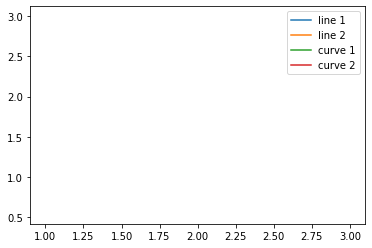

In [279]:
x = [1,1,1,1,1,1]
y = [3,3,3,3,3,3]
  
# plot lines
plt.plot(x, y, label = "line 1")
plt.plot(y, x, label = "line 2")
plt.plot(x, np.sin(x), label = "curve 1")
plt.plot(x, np.cos(x), label = "curve 2")
plt.legend()
plt.show()

In [287]:
itemList = list(D.values())
type(list(df1.loc[0,'FDist'].values()))
list(df1.loc[0,'FDist'].values())
df1.loc[0,'STORY_DATE_TIME']

datetime.date(2013, 6, 1)

In [294]:
# itemList = list(D.values())

for row in range(0,6):
    itemList = [list(df1.loc[row,'FDist'].values())]
    y = df1.loc[row,'STORY_DATE_TIME']
#     plt.plot(y,itemList)
    print(itemList)
    print(y)

# itemList = [[1,4,5],[2,3,4],[5,6,7]]
# plt.plot([1,2,3],itemList)
# plt.show()
# print(itemList)

[[1, 1, 1]]
2013-06-01
[[2, 1, 1]]
2013-06-01
[[1]]
2013-05-01
[[1, 1, 1]]
2013-06-01
[[1, 1, 1]]
2013-06-01
[[1, 1, 1]]
2013-06-01


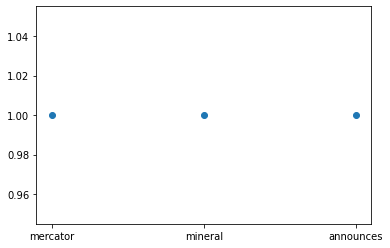

In [291]:
D = dict(df1.loc[0,'FDist'])
plt.scatter(*zip(*D.items()))
plt.show()

In [141]:
fdist = FreqDist()
myList = ["mercator", "mineral", "announces", "senior", "management", "change"]
for word in myList :
    fdist[word] +=1
print(type(fdist))

<class 'nltk.probability.FreqDist'>
